# Learning

After this notebook you should:
* know where the weights come from
* why we need non-linearities

## A feed-forward neural network
Recall our network <img src="pics/nn.png"> 
$$NN_{MLP1}(\mathbf{x})=g(\mathbf{xW^1+b^1})\mathbf{W^2}+\mathbf{b^2}$$


So where do the weights come from? 

We can apply a learning algorithm called **backprob** to learn (or estimate) these weights. But before we get there, lets first look at an intuition.

We want to adjust the weights so that *a small change in the output should have a small effect in the output*.
However, with a simple perceptron a small change might often have a large effect. Remember, the decision function for the perceptron is a threshold, this can be seen as a **step function**: <img src="https://upload.wikimedia.org/wikipedia/commons/a/ac/HardLimitFunction.png" width=300> 

It is 0 for everything below 0 and 1 for positive outputs. If you are already close to the threshold, a small change might have a large effect.
<img src="http://neuralnetworksanddeeplearning.com/images/tikz8.png">

For another reason that we will see later, we will not use simple thresholding, i.e., a **step function**, but rather a smoother function like the **sigmoid** function.

### What's $g$? A sigmoid neuron

A commonly used activation function $g$ is the sigmoid **sigmoid function** (aka logistic sigmoid function). A sigmoid neuron gets inputs and weights them by $W$, then it applies the **non-linearity** $g$.

$$y = g_{sigmoid}(x \cdot w + b)$$

where $$g_{sigmoid} = \sigma(z) = \frac{1}{1 + e ^{-z}}$$

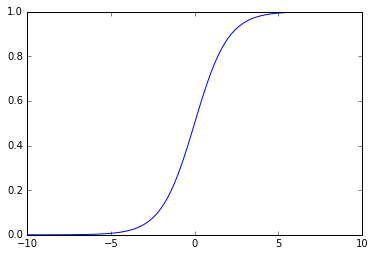

In [54]:
%matplotlib inline
## credits: http://squall0032.tumblr.com/post/77300791096/plotting-a-sigmoid-function-using
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()



Assume now our network above contains sigmoid neurons. 
$$NN_{MLP1}(\mathbf{x})=g_{sigmoid}(\mathbf{xW^1+b^1})\mathbf{W^2}+\mathbf{b^2}$$


(CREDITS: The following has been taken from AJ and ZA's tutorial):
We'll start with a hypothetical (xkcd-style).

<img src="https://what-if.xkcd.com/imgs/whatif-logo.png">

### What if all the non-linearities in an NN suddenly vanished?

For now, lets simply ignore the bias term to simplfiy our notation. 

A neural network with an input layer, a middle layer, and an output layer computes the following:

$$\mathbf{y} = g(W^{(0)}g(W^{(1)}g(W^{(0)}\mathbf{x})))$$

$g$ is a non-linearity, which could be different for each layer.

If we change $g$ to a linear function (e.g. a scaling factor), it can simply be multiplied into the weights matrices. Below we assume that $g = 1$, which allows us to simplify the expression:

$$\mathbf{y} = (W^{(0)}(W^{(1)}(W^{(0)}\mathbf{x})))$$

Since matrix multiplication is associative:

$$A(BC) = (AB)C,$$

we can get rid of the brackets altogether:

$$\mathbf{y} = W^{(0)}W^{(1)}W^{(0)}\mathbf{x}.$$

The series of linear transformations can be summarized in a single transformation matrix :

$$T = W^{(0)}W^{(1)}W^{(0)}.$$

And so the prediction of the neural network becomes:

$$\mathbf{y} = T\mathbf{x}.$$

The effective number of parameters in the now non non-linear neural network is $|\mathbf{y}| \times |\mathbf{x}|$, which is precisely the same as a standard linear model.

I.E, the non-linearities are crucial!


## Forward pass 

What we have called 'compute' before is usually referred to as the forward pass in the neural network. It is going from the inputs through the layers to the outputs.

In [55]:
# forward-pass of a 3-layer neural network:
f = lambda x: 1.0/(1.0 + np.exp(-x)) # activation function (use sigmoid)
x = np.random.randn(3) # random input vector of three numbers (1x3) 
W1 = np.zeros((3,4))   # Weights (3x4)
W2 = np.zeros((4,4))   # Weights (4x4)
W3 = np.zeros((4,1))   # Weights (4x1)
b1 = np.zeros((1,4))
b2 = np.zeros((1,4))
b3 = np.zeros((1,4))
h1=f(np.dot(x,W1)+b1) # calculate the activations of the first hidden layer (1x4) - linear transformation followed by non-linearity!
h2=f(np.dot(h1,W2)+b2) # calculate the activations of the second hidden layer (1x4)
out = np.dot(W3, h2) + b3 # output neuron (1x1)
print(out)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


## Backward pass (derivates)


**High level idea**: Calculate partial derivatives with respect to each parameter in the network.  The **backpropagation algorithm** is a way of computing gradients of expressions through recursive application of the **chain rule**.

### What is a derivative?

A derivative gives us a linear approximation of the function at a specific point.

So given a function $f$, its derivate at point $a$, $m = f'(a)$, we can approximate the original function as 

$$g(x) = f(a) + m(a - x)$$

This allows us to estimate the impact of a change in a parameter with respect to the final output of the network. It is especially useful if we make the network compute a **scalar loss** during training, i.e. have a $1 \times 1$ output node that measures how much we **dislike** the current prediction.

### Backpropagation


Compute error signal $\delta_j = a_j - y$ for each output node, then propagate this back through the network. 

We'll return to this when we see computational graphs.

Video: [Andrew Ng's video on Coursera](https://class.coursera.org/ml-003/lecture/51)

### Commonly-used activation functions
Tanh: <img src="http://cs231n.github.io/assets/nn1/tanh.jpeg">
Sigmoid: <img src="http://cs231n.github.io/assets/nn1/sigmoid.jpeg">
ReLu: <img src="http://cs231n.github.io/assets/nn1/relu.jpeg">



# Multi-class classification

Usually we will have problems with multiple classes. In deep learning, each class is usually represented as a **one-hot** vector.

###  What is y?
<img src="pics/multiclass.png">


### What is x?

In deep learning we usually work with dense representations. Each feature is a vector of numbers.

**a) sparse representation vs b) dense representation**

<img src="pics/sparsevsdense.png">


### References
* More details in [Michael Nielsen's book chapter 1](http://neuralnetworksanddeeplearning.com/chap1.html)
* Yoav Goldberg's tutorial: [A Primer on Neural Network Models for Natural Language Processing](http://arxiv.org/abs/1510.00726)
* AJ's [simplest_nn](https://github.com/andersjo/simplest_nn)
* CS231n [notes](http://cs231n.github.io/optimization-2/)